### 実験結果をデータフレームにまとめる  

In [4]:
import pandas as pd
import os

data="FashionMNIST"
CWALDP_params = [(7*7,2,8,2),(7*7,2,8,0),(7*7,4,8,2),(7*7,4,8,0),(14*14,2,10,2),(14*14,2,13,2),(14*14,2,10,0),(14*14,2,13,0),(14*14,4,10,2),(14*14,4,13,2),(14*14,4,10,0),(14*14,4,13,0)]
eps_list=[1,2,3]
model="model2"
date="20260104"
unique=False
all_results=[]
for eps in eps_list:
    for P, L, cluster_num,label_epsilon in CWALDP_params:
            filename_cwaldp = f"../../data/{date}/{unique}_unique_RR_waldp_L{L}_PI{P}_C{cluster_num}_eps{eps}_label_noise_{label_epsilon}_{model}.csv"
            if os.path.exists(filename_cwaldp):
                    df = pd.read_csv(filename_cwaldp, comment="#")
                    test_accuracy_mean = df["test_accuracy"].mean()  
                    train_accuracy_mean = df["train_accuracy"].mean()  
                    test_noise_accuracy_mean = df["test_noise_accuracy"].mean()       
                    print(f"eps: {eps}, P: {P}, L: {L}, cluster_num: {cluster_num} => test_accuracy_mean: {test_accuracy_mean}, train_accuracy_mean: {train_accuracy_mean}, test_noise_accuracy_mean: {test_noise_accuracy_mean}")             
                    all_results.append({
                        "P": P,
                        "L": L,
                        "cluster_num": cluster_num,
                        "epsilon": eps,
                        "label_epsilon": label_epsilon,
                        "test_accuracy_mean": test_accuracy_mean,
                        "train_accuracy_mean": train_accuracy_mean,
                        "test_noise_accuracy_mean": test_noise_accuracy_mean
                    })
result_df=pd.DataFrame(all_results)
print(result_df.sort_values(by=[ "label_epsilon","P","L","cluster_num","epsilon"]).reset_index(drop=True))

eps: 1, P: 49, L: 2, cluster_num: 8 => test_accuracy_mean: 0.6192483333333334, train_accuracy_mean: 0.3465849999999999, test_noise_accuracy_mean: 0.696425
eps: 1, P: 49, L: 2, cluster_num: 8 => test_accuracy_mean: 0.7848600000000002, train_accuracy_mean: 0.76068, test_noise_accuracy_mean: 0.7805466666666666
eps: 1, P: 49, L: 4, cluster_num: 8 => test_accuracy_mean: 0.4982466666666667, train_accuracy_mean: 0.20506000000000002, test_noise_accuracy_mean: 0.31899666666666665
eps: 1, P: 49, L: 4, cluster_num: 8 => test_accuracy_mean: 0.5942600000000001, train_accuracy_mean: 0.38557666666666657, test_noise_accuracy_mean: 0.4191333333333333
eps: 1, P: 196, L: 2, cluster_num: 10 => test_accuracy_mean: 0.44126666666666664, train_accuracy_mean: 0.28213000000000005, test_noise_accuracy_mean: 0.5841433333333332
eps: 1, P: 196, L: 2, cluster_num: 13 => test_accuracy_mean: 0.32254333333333335, train_accuracy_mean: 0.2780933333333333, test_noise_accuracy_mean: 0.5631333333333333
eps: 1, P: 196, L: 2,

### PI=0.25

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 'P', 'L', 'cluster_num' でグループ化してループ処理
groups = result_df[(result_df["P"]==196)&(result_df["label_epsilon"]==2)].groupby(["P","L","cluster_num"])

for name, group in groups:
    label_str = f"P={name[0]}, L={name[1]}, Cluster={name[2]}"
    
    # 1. Test Accuracy をプロット（実線 '-'）
    # 戻り値として Line2D のリストを受け取ります
    lines = plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='o', linestyle=':', label=label_str)

    # 2. 自動で割り当てられた色を取得
    color = lines[0].get_color()

    # 3. Train Accuracy をプロット（点線 '--'）
    # 取得した色 (color) を指定し、同じ色にします
    # 凡例が重複しないように label は外すか、必要に応じて変更してください
    #plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='^', linestyle=':', color=color)
    #plt.plot(group['epsilon'], group['test_noise_accuracy_mean'], marker='o', linestyle='-.', color=color)

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('train_accuracy')
plt.ylim(0.2, 0.4)
plt.title('label_noise=2, Train Accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)

# 表示
plt.show()


plt.figure(figsize=(10, 6))
# 'P', 'L', 'cluster_num' でグループ化してループ処理
groups = result_df[(result_df["P"]==196)&(result_df["label_epsilon"]==2)].groupby(["P","L","cluster_num"])

for name, group in groups:
    label_str = f"P={name[0]}, L={name[1]}, Cluster={name[2]}"
    
    # 1. Test Accuracy をプロット（実線 '-'）
    # 戻り値として Line2D のリストを受け取ります
    lines = plt.plot(group['epsilon'], group['test_accuracy_mean'], marker='o', label=label_str)

    # 2. 自動で割り当てられた色を取得
    color = lines[0].get_color()

    # 3. Train Accuracy をプロット（点線 '--'）
    # 取得した色 (color) を指定し、同じ色にします
    # 凡例が重複しないように label は外すか、必要に応じて変更してください
    #plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='^', linestyle=':', color=color)
    #plt.plot(group['epsilon'], group['test_noise_accuracy_mean'], marker='o', linestyle='-.', color=color)

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('test_accuracy')
plt.ylim(0.2, 0.4)
plt.title('label_noise=2, test_accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)


# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('test_accuracy')
plt.ylim(0.2, 0.7)
plt.title('label_noise=0, Test Accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)

# 表示
plt.show()




plt.figure(figsize=(10, 6))

# 'P', 'L', 'cluster_num' でグループ化してループ処理
groups = result_df[(result_df["P"]==196)&(result_df["label_epsilon"]==2)].groupby(["P","L","cluster_num"])

for name, group in groups:
    label_str = f"P={name[0]}, L={name[1]}, Cluster={name[2]}"
    
    # 1. Test Accuracy をプロット（実線 '-'）
    # 戻り値として Line2D のリストを受け取ります
    lines = plt.plot(group['epsilon'], group['test_noise_accuracy_mean'], marker='o', label=label_str)

    # 2. 自動で割り当てられた色を取得
    color = lines[0].get_color()

    # 3. Train Accuracy をプロット（点線 '--'）
    # 取得した色 (color) を指定し、同じ色にします
    # 凡例が重複しないように label は外すか、必要に応じて変更してください
    #plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='^', linestyle=':', color=color)
    #plt.plot(group['epsilon'], group['test_noise_accuracy_mean'], marker='o', linestyle='-.', color=color)

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('test_noise_accuracy')
plt.ylim(0.4, 0.7)
plt.title('label_noise=2, test_noise_accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)


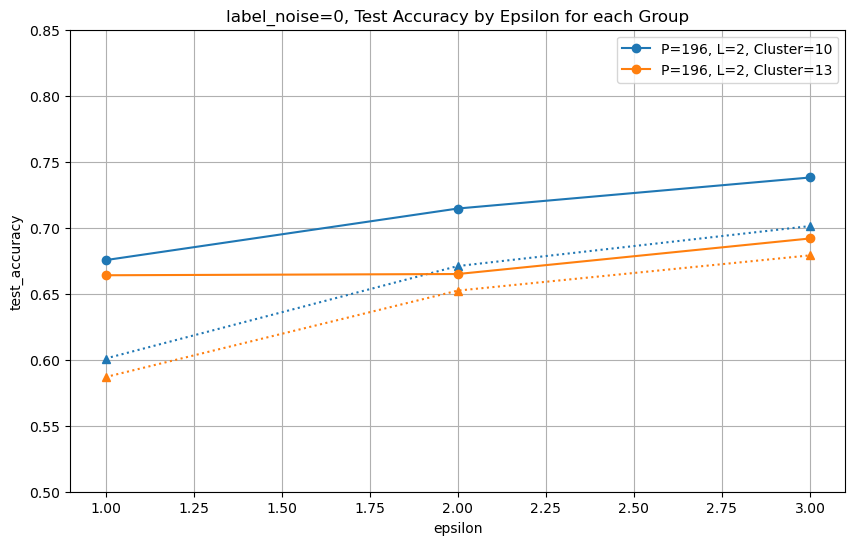

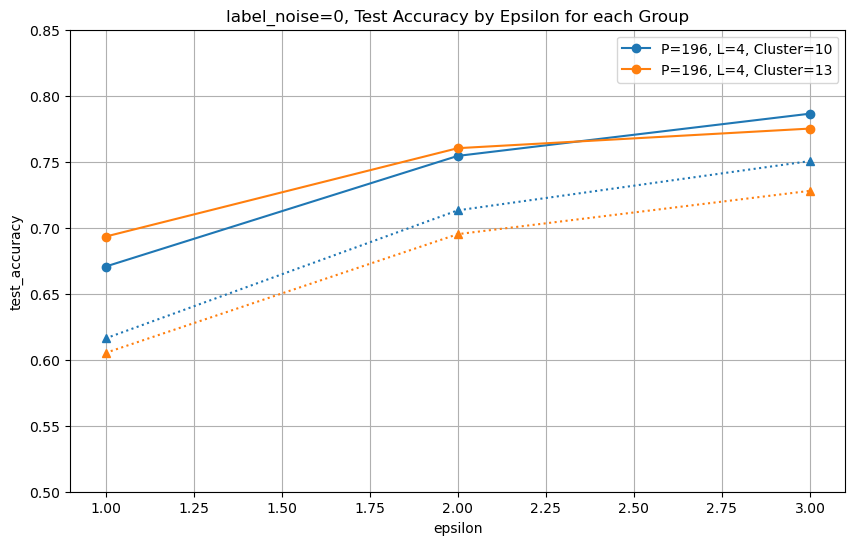

In [61]:
plt.figure(figsize=(10, 6))
# 'P', 'L', 'cluster_num' でグループ化してループ処理
groups = result_df[(result_df["P"]==196)&(result_df["L"]==2)&(result_df["label_epsilon"]==0)].groupby(["P","L","cluster_num"])

for name, group in groups:
    label_str = f"P={name[0]}, L={name[1]}, Cluster={name[2]}"
    
    # 1. Test Accuracy をプロット（実線 '-'）
    # 戻り値として Line2D のリストを受け取ります
    lines = plt.plot(group['epsilon'], group['test_accuracy_mean'], marker='o', label=label_str)

    # 2. 自動で割り当てられた色を取得
    color = lines[0].get_color()

    # 3. Train Accuracy をプロット（点線 '--'）
    # 取得した色 (color) を指定し、同じ色にします
    # 凡例が重複しないように label は外すか、必要に応じて変更してください
    plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='^', linestyle=':', color=color)
    #plt.plot(group['epsilon'], group['test_noise_accuracy_mean'], marker='o', linestyle='-.', color=color)

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('test_accuracy')
plt.ylim(0.5, 0.85)
plt.title('label_noise=0, Test Accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)
# 表示
plt.show()


plt.figure(figsize=(10, 6))
# 'P', 'L', 'cluster_num' でグループ化してループ処理
groups = result_df[(result_df["P"]==196)&(result_df["L"]==4)&(result_df["label_epsilon"]==0)].groupby(["P","L","cluster_num"])

for name, group in groups:
    label_str = f"P={name[0]}, L={name[1]}, Cluster={name[2]}"
    
    # 1. Test Accuracy をプロット（実線 '-'）
    # 戻り値として Line2D のリストを受け取ります
    lines = plt.plot(group['epsilon'], group['test_accuracy_mean'], marker='o', label=label_str)

    # 2. 自動で割り当てられた色を取得
    color = lines[0].get_color()

    # 3. Train Accuracy をプロット（点線 '--'）
    # 取得した色 (color) を指定し、同じ色にします
    # 凡例が重複しないように label は外すか、必要に応じて変更してください
    plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='^', linestyle=':', color=color)
    #plt.plot(group['epsilon'], group['test_noise_accuracy_mean'], marker='o', linestyle='-.', color=color)


# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('test_accuracy')
plt.ylim(0.5, 0.85)
plt.title('label_noise=0, Test Accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)
# 表示
plt.show()

### UTS

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 'P', 'L', 'cluster_num' でグループ化してループ処理
groups = result_df[result_df["label_epsilon"]==2].groupby(["P","L","cluster_num"])

for name, group in groups:
    # name は (Pの値, Lの値, cluster_numの値) のタプルになっています
    label_str = f"P={name[0]}, L={name[1]}, Cluster={name[2]}"
    
    # 横軸: epsilon, 縦軸: test_accuracy_mean
    plt.plot(group['epsilon'], group['test_accuracy_mean'], marker='o', label=label_str)
    #plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='o', label=label_str)

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('test_accuracy')
plt.title('label_noise=2, Test Accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)

# 表示
plt.show()


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 'P', 'L', 'cluster_num' でグループ化してループ処理
groups = result_df[result_df["label_epsilon"]==0].groupby(["P","L","cluster_num"])

for name, group in groups:
    # name は (Pの値, Lの値, cluster_numの値) のタプルになっています
    label_str = f"P={name[0]}, L={name[1]}, Cluster={name[2]}"
    
    # 横軸: epsilon, 縦軸: test_accuracy_mean
    plt.plot(group['epsilon'], group['test_accuracy_mean'], marker='o', label=label_str)
    #plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='o', label=label_str)

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('test_accuracy')
plt.title('label_noise=0, Test Accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)

# 表示
plt.show()

## PI=0.5のデータの比較 

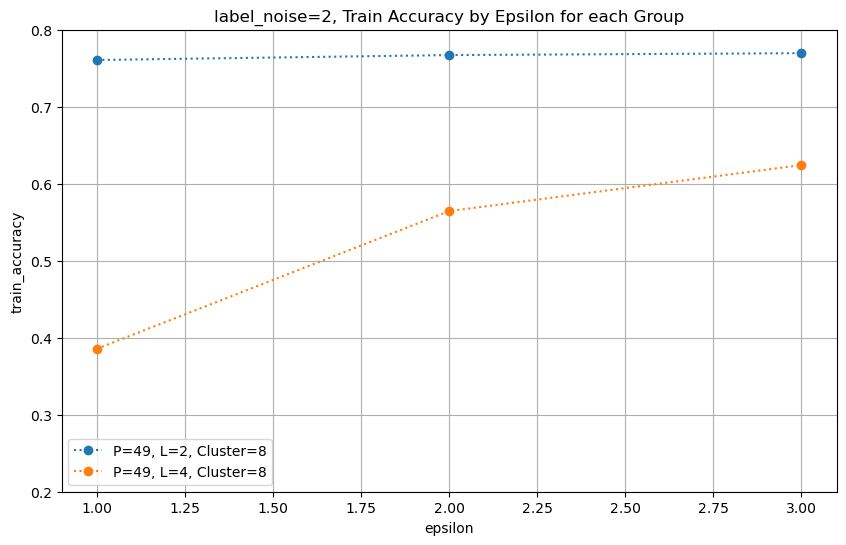

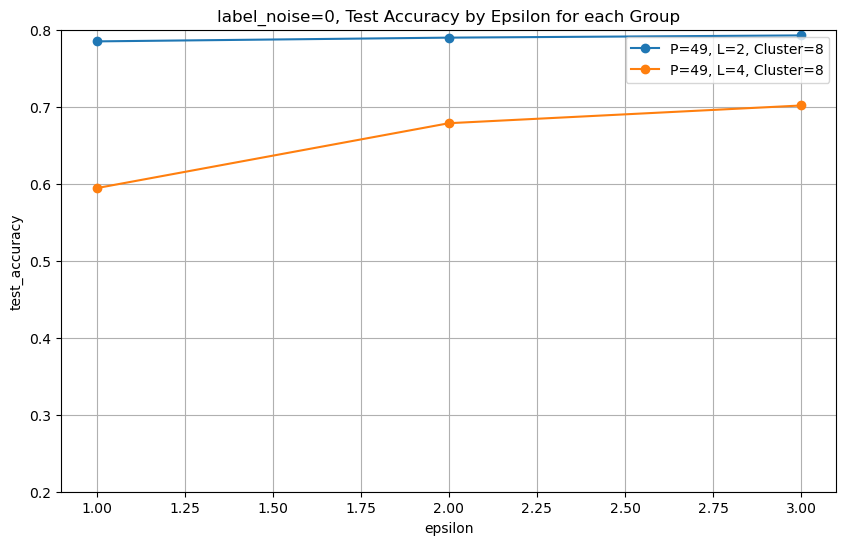

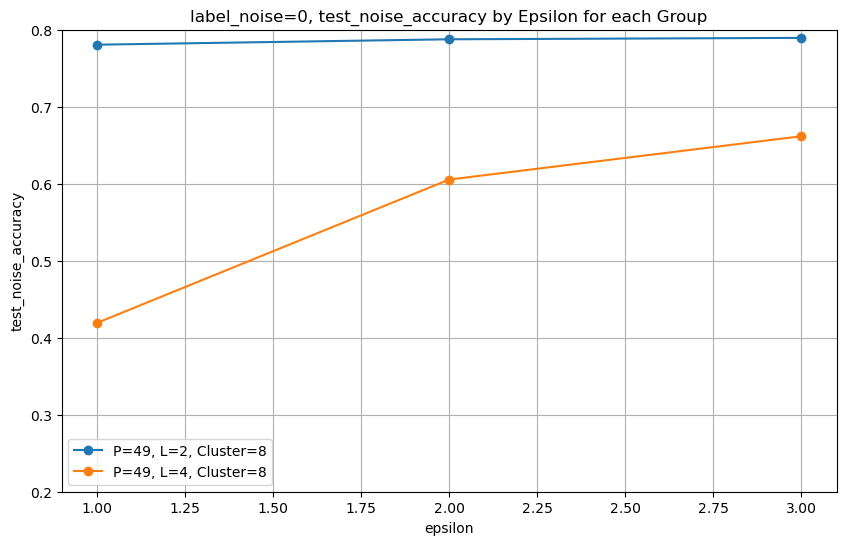

In [60]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 'P', 'L', 'cluster_num' でグループ化してループ処理
groups = result_df[(result_df["P"]==49)&(result_df["label_epsilon"]==0)].groupby(["P","L","cluster_num"])

for name, group in groups:
    label_str = f"P={name[0]}, L={name[1]}, Cluster={name[2]}"
    
    # 1. Test Accuracy をプロット（実線 '-'）
    # 戻り値として Line2D のリストを受け取ります
    lines = plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='o', linestyle=':', label=label_str)

    # 2. 自動で割り当てられた色を取得
    color = lines[0].get_color()

    # 3. Train Accuracy をプロット（点線 '--'）
    # 取得した色 (color) を指定し、同じ色にします
    # 凡例が重複しないように label は外すか、必要に応じて変更してください
    #plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='^', linestyle=':', color=color)
    #plt.plot(group['epsilon'], group['test_noise_accuracy_mean'], marker='o', linestyle='-.', color=color)

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('train_accuracy')
plt.ylim(0.2, 0.8)
plt.title('label_noise=2, Train Accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)

# 表示
plt.show()


plt.figure(figsize=(10, 6))
# 'P', 'L', 'cluster_num' でグループ化してループ処理
groups = result_df[(result_df["P"]==49)&(result_df["label_epsilon"]==0)].groupby(["P","L","cluster_num"])

for name, group in groups:
    label_str = f"P={name[0]}, L={name[1]}, Cluster={name[2]}"
    
    # 1. Test Accuracy をプロット（実線 '-'）
    # 戻り値として Line2D のリストを受け取ります
    lines = plt.plot(group['epsilon'], group['test_accuracy_mean'], marker='o', label=label_str)

    # 2. 自動で割り当てられた色を取得
    color = lines[0].get_color()

    # 3. Train Accuracy をプロット（点線 '--'）
    # 取得した色 (color) を指定し、同じ色にします
    # 凡例が重複しないように label は外すか、必要に応じて変更してください
    #plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='^', linestyle=':', color=color)
    #plt.plot(group['epsilon'], group['test_noise_accuracy_mean'], marker='o', linestyle='-.', color=color)

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('test_accuracy')
plt.ylim(0.2, 0.4)
plt.title('label_noise=0, test_accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)


# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('test_accuracy')
plt.ylim(0.2, 0.8)
plt.title('label_noise=0, Test Accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)

# 表示
plt.show()




plt.figure(figsize=(10, 6))

# 'P', 'L', 'cluster_num' でグループ化してループ処理
groups = result_df[(result_df["P"]==49)&(result_df["label_epsilon"]==0)].groupby(["P","L","cluster_num"])

for name, group in groups:
    label_str = f"P={name[0]}, L={name[1]}, Cluster={name[2]}"
    
    # 1. Test Accuracy をプロット（実線 '-'）
    # 戻り値として Line2D のリストを受け取ります
    lines = plt.plot(group['epsilon'], group['test_noise_accuracy_mean'], marker='o', label=label_str)

    # 2. 自動で割り当てられた色を取得
    color = lines[0].get_color()

    # 3. Train Accuracy をプロット（点線 '--'）
    # 取得した色 (color) を指定し、同じ色にします
    # 凡例が重複しないように label は外すか、必要に応じて変更してください
    #plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='^', linestyle=':', color=color)
    #plt.plot(group['epsilon'], group['test_noise_accuracy_mean'], marker='o', linestyle='-.', color=color)

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('test_noise_accuracy')
plt.ylim(0.2, 0.8)
plt.title('label_noise=0, test_noise_accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)


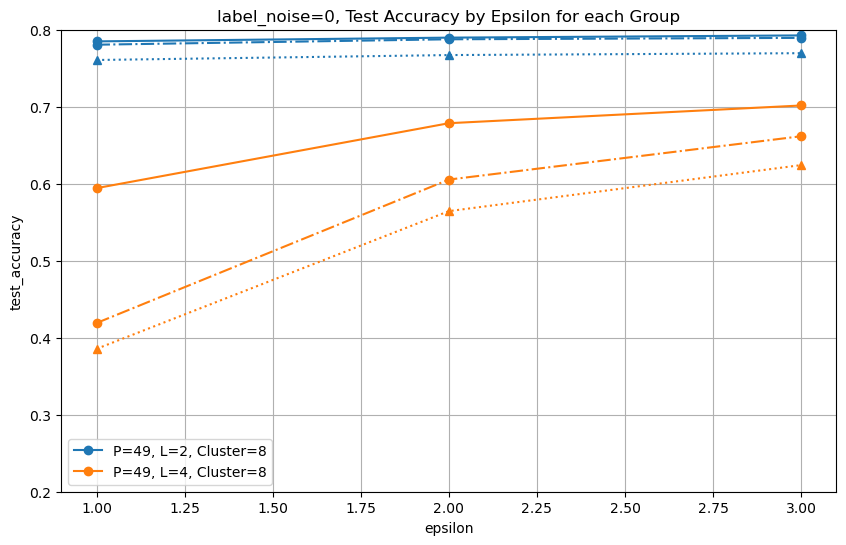

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 'P', 'L', 'cluster_num' でグループ化してループ処理
groups = result_df[(result_df["P"]==49)&(result_df["label_epsilon"]==0)].groupby(["P","L","cluster_num"])

for name, group in groups:
    # name は (Pの値, Lの値, cluster_numの値) のタプルになっています
    label_str = f"P={name[0]}, L={name[1]}, Cluster={name[2]}"
    
    # 1. Test Accuracy をプロット（実線 '-'）
    # 戻り値として Line2D のリストを受け取ります
    lines = plt.plot(group['epsilon'], group['test_accuracy_mean'], marker='o', linestyle='-', label=label_str)

    # 2. 自動で割り当てられた色を取得
    color = lines[0].get_color()

    # 3. Train Accuracy をプロット（点線 '--'）
    # 取得した色 (color) を指定し、同じ色にします
    # 凡例が重複しないように label は外すか、必要に応じて変更してください
    plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='^', linestyle=':', color=color)
    plt.plot(group['epsilon'], group['test_noise_accuracy_mean'], marker='o', linestyle='-.', color=color)

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('test_accuracy')
plt.ylim(0.2, 0.8)
plt.title('label_noise=0, Test Accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)

# 表示
plt.show()

# 全画像データを利用

In [32]:
import pandas as pd
import os

data="FashionMNIST"
CWALDP_params = [(14*14,2,10,2),(14*14,2,13,2),(14*14,2,10,0),(14*14,2,13,0),(14*14,4,10,2),(14*14,4,13,2),(14*14,4,10,0),(14*14,4,13,0)]
eps_list=[1,2,3]
model="model2"
date="20260104"
unique=False
all_results=[]
for eps in eps_list:
    for P, L, cluster_num,label_epsilon in CWALDP_params:
            filename_cwaldp = f"../../data/{date}/{unique}_unique_RR_waldp_L{L}_PI{P}_C{cluster_num}_eps{eps}_label_noise_{label_epsilon}_{model}.csv"
            if os.path.exists(filename_cwaldp):
                    df = pd.read_csv(filename_cwaldp, comment="#")
                    test_accuracy_mean = df["test_accuracy"].mean()  
                    train_accuracy_mean = df["train_accuracy"].mean()  
                    test_noise_accuracy_mean = df["test_noise_accuracy"].mean()       
                    print(f"eps: {eps}, P: {P}, L: {L}, cluster_num: {cluster_num} => test_accuracy_mean: {test_accuracy_mean}, train_accuracy_mean: {train_accuracy_mean}, test_noise_accuracy_mean: {test_noise_accuracy_mean}")             
                    all_results.append({
                        "P": P,
                        "L": L,
                        "cluster_num": cluster_num,
                        "epsilon": eps,
                        "label_epsilon": label_epsilon,
                        "test_accuracy_mean": test_accuracy_mean,
                        "train_accuracy_mean": train_accuracy_mean,
                        "test_noise_accuracy_mean": test_noise_accuracy_mean
                    })
result_df=pd.DataFrame(all_results)
print(result_df)
print(result_df.sort_values(by=[ "label_epsilon","P","L","cluster_num","epsilon"]).reset_index(drop=True))

eps: 1, P: 196, L: 2, cluster_num: 10 => test_accuracy_mean: 0.44126666666666664, train_accuracy_mean: 0.28213000000000005, test_noise_accuracy_mean: 0.5841433333333332
eps: 1, P: 196, L: 2, cluster_num: 13 => test_accuracy_mean: 0.32254333333333335, train_accuracy_mean: 0.2780933333333333, test_noise_accuracy_mean: 0.5631333333333333
eps: 1, P: 196, L: 2, cluster_num: 10 => test_accuracy_mean: 0.6754433333333336, train_accuracy_mean: 0.6008966666666667, test_noise_accuracy_mean: 0.6182433333333335
eps: 1, P: 196, L: 2, cluster_num: 13 => test_accuracy_mean: 0.6639866666666666, train_accuracy_mean: 0.5868499999999999, test_noise_accuracy_mean: 0.6008
eps: 1, P: 196, L: 4, cluster_num: 10 => test_accuracy_mean: 0.34210999999999997, train_accuracy_mean: 0.28136000000000005, test_noise_accuracy_mean: 0.55518
eps: 1, P: 196, L: 4, cluster_num: 13 => test_accuracy_mean: 0.29151666666666665, train_accuracy_mean: 0.28132333333333326, test_noise_accuracy_mean: 0.5407833333333334
eps: 1, P: 196

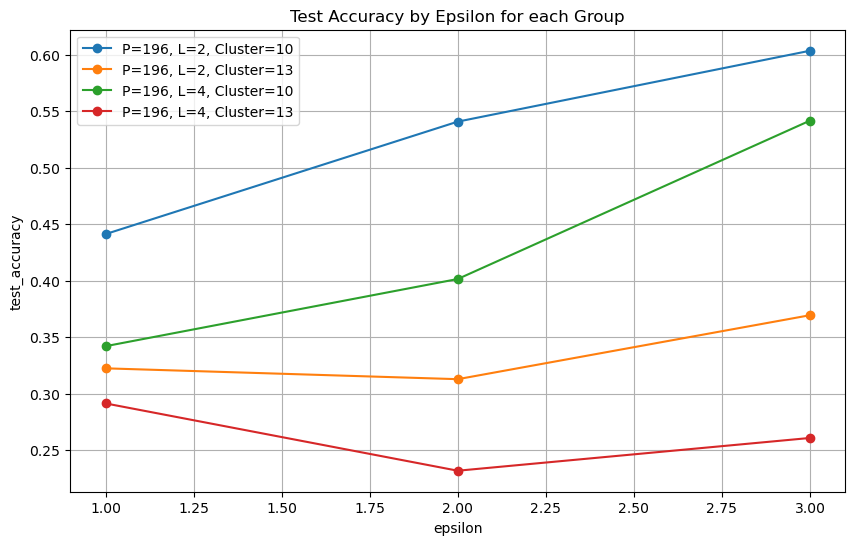

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 'P', 'L', 'cluster_num' でグループ化してループ処理
groups = result_df[result_df["label_epsilon"]==2].groupby(["P","L","cluster_num"])

for name, group in groups:
    # name は (Pの値, Lの値, cluster_numの値) のタプルになっています
    label_str = f"P={name[0]}, L={name[1]}, Cluster={name[2]}"
    
    # 横軸: epsilon, 縦軸: test_accuracy_mean
    plt.plot(group['epsilon'], group['test_accuracy_mean'], marker='o', label=label_str)
    #plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='o', label=label_str)

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('test_accuracy')
plt.title('Test Accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)

# 表示
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 'P', 'L', 'cluster_num' でグループ化してループ処理
groups = result_df[result_df["label_epsilon"]==2].groupby(["P","L","cluster_num"])

for name, group in groups:
    # name は (Pの値, Lの値, cluster_numの値) のタプルになっています
    label_str = f"P={name[0]}, L={name[1]}, Cluster={name[2]}"
    
    # 横軸: epsilon, 縦軸: test_accuracy_mean
    plt.plot(group['epsilon'], group['test_accuracy_mean'], marker='o', label=label_str)
    #plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='o', label=label_str)

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('test_accuracy')
plt.title('Test Accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)

# 表示
plt.show()

In [ ]:

plt.figure(figsize=(10, 6))
# 'P', 'L', 'cluster_num' でグループ化してループ処理
groups = result_df[(result_df["P"]==49)&(result_df["label_epsilon"]==0)].groupby(["P","L","cluster_num"])

for name, group in groups:
    label_str = f"P={name[0]}, L={name[1]}, Cluster={name[2]}"
    
    # 1. Test Accuracy をプロット（実線 '-'）
    # 戻り値として Line2D のリストを受け取ります
    lines = plt.plot(group['epsilon'], group['test_accuracy_mean'], marker='o', label=label_str)

    # 2. 自動で割り当てられた色を取得
    color = lines[0].get_color()

    # 3. Train Accuracy をプロット（点線 '--'）
    # 取得した色 (color) を指定し、同じ色にします
    # 凡例が重複しないように label は外すか、必要に応じて変更してください
    #plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='^', linestyle=':', color=color)
    #plt.plot(group['epsilon'], group['test_noise_accuracy_mean'], marker='o', linestyle='-.', color=color)

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('test_accuracy')
plt.ylim(0.2, 0.4)
plt.title('label_noise=0, test_accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)


# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('test_accuracy')
plt.ylim(0.2, 0.8)
plt.title('label_noise=0, Test Accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)

# 表示
plt.show()